In [284]:
import numpy as np
import math
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import time
import random


class SAnnealing(object):

    def __init__(self, domain, step = 1, final_temperature=0.1, temperature = 100, alpha=0.95, equilibrium=10, time = 0, limited_decimals = 1, capacity = 5, data = []):
        self.domain = domain
        self.step = step
        self.temperature = temperature
        self.final_temperature = final_temperature
        self.alpha = alpha
        self.equilibrium = equilibrium
        self.time = time
        self.limited_decimals = limited_decimals
        self.data = data

    def cost_function(self, f, x):
        return f(self.data, x)

    def getTotalDemand(self, data):
        totalDemand = 0
        for element in self.data:
            totalDemand += element[2]
        return totalDemand

    def CVRP_function(routes):
        distance = 0
        for i in np.arange(len(routes)-1):
            distance += np.sqrt((routes[i][0] - routes[i+1][0])**2 + (routes[i][1] - routes[i+1][1])**2)
        return distance

    def getAllDistances(self, routes):
        allDistances = 0
        for route in routes:
            coordenates = []
            coordenates.append(self.data[0][1])
            for node in route:
                coordenates.append(self.data[node][1])
            coordenates.append(self.data[0][1])
            allDistances += CVRP_function(coordenates)
        return allDistances

    def getDemand(self, route):
        demand = 0
        for node in route:
            demand += self.data[node][2]
        return demand

    def create_first_solution(self):
        totalDemand = getTotalDemand(self.data)
        capacity = 30

        totalCars = round(totalDemand / capacity)

        while(1):
            routes = []

            for i in np.arange(totalCars):
                routes.append([])
            respaldRoutes = routes.copy()
            demands = []
            for i in np.arange(len(self.data) - 1):
                index = random.randint(0,(totalCars -1))
                routes[index].append(i+1)

            for route in routes:
                demands.append(getDemand(route, self.data))
            
            isUnderDemand = True
            for demand in demands:
                if(demand > capacity):
                    isUnderDemand = False

            if(isUnderDemand):
                break

        return routes


    def create_neighbor_solution(self, actual_solution):    
        while(1):

            neighbor = actual_solution.copy()
            idx = random.randint(0,(len(self.data)-2))

            lenList = 0
            i = 0
            chargedNode = 0
            chargedRoute = 0
            for route in neighbor:
                for node in route:
                    if(i == idx):
                        chargedNode = node
                    i += 1
                if(chargedNode):
                    route.remove(chargedNode)
                    break
                chargedRoute += 1

            idxRoute = random.randint(0,(len(neighbor)-1))
            neighbor[idxRoute].insert(0, chargedNode)

            demands = []
            for route in neighbor:
                demands.append(getDemand(route, self.data))

            isUnderDemand = True
            for demand in demands:
                if(demand > capacity):
                    isUnderDemand = False
            
            if(isUnderDemand):
                return neighbor


    def aceptance_probability(self, deltaE, temperature):
        try:
            r = math.exp(-deltaE/temperature)
        except OverflowError:
            r = float("inf") 
        return r


    def update_temperature(self, temperature):
        return self.alpha * temperature


    def fit(self, objetive):
        self.cost_ = []
        actual_solution = self.create_first_solution()
        best_solution = actual_solution.copy()
        epoch = 0
        number_tested_solution = 0
        aceptanced = 100
        inicio = time.time()
        while (self.temperature > self.final_temperature):
            number_worst_solution_acepted = 0
            i = 0
            while (i < self.equilibrium):
                random_solution = self.create_neighbor_solution(actual_solution)
                number_tested_solution += 1
                delta_E = self.cost_function(objetive, random_solution) - self.cost_function(objetive, actual_solution)
                if delta_E > 0:
                    actual_solution = random_solution.copy()
                else:
                    deg_deltaE = self.aceptance_probability(-delta_E, self.temperature)
                    if(np.random.uniform(0, 1) < deg_deltaE):
                        actual_solution = random_solution.copy()
                        number_worst_solution_acepted += 1
                x = self.cost_function(objetive, actual_solution)
                #self.cost_.append((x,y))
                epoch_strlen = len(str(epoch))
                fin = time.time()
                total = fin - inicio
                sys.stderr.write('\r%0*d Epoch | Equilibrium %d | Temperature %.2f '
                                '| Actual solution %f | Aceptance : %.2f | Time: %f' 
                        %
                        (epoch_strlen, epoch+1, i+1, self.temperature, 
                        x,aceptanced, total))
                time.sleep(self.time)
                sys.stderr.flush()
                i += 1
                epoch += 1
            aceptanced = number_worst_solution_acepted * 100 /number_tested_solution
            self.temperature = self.update_temperature(self.temperature)

        print(f'This are the best routes: {actual_solution}')

In [285]:
data = ((0,(38,46),0), (1,(59,46),16), (2,(96,42),18), (3,(47,61),1), (4,(26,15),13), (5,(66,6),8))

sa = SAnnealing(domain=((0, 32),), step=1, final_temperature=0.1, temperature=500, alpha=0.95, equilibrium=10, time=0, limited_decimals=20, capacity = 5, data = data)
sa.fit(getAllDistances)

1670 Epoch | Equilibrium 10 | Temperature 0.10 | Actual solution 280.199933 | Aceptance : 0.60 | Time: 1.27550672

This are the best routes: [[4, 1], [2, 5, 3]]


In [286]:

for i in np.arange(len(data)):
    print(data[i][0], data[i][1][0], data[i][1][1], data[i][2])


0 38 46 0
1 59 46 16
2 96 42 18
3 47 61 1
4 26 15 13
5 66 6 8


In [287]:
objects = [[38, 46], [59,46], [66,6], [38, 46]]

def CVRP_function(routes):
    distance = 0
    for i in np.arange(len(routes)-1):
        distance += np.sqrt((routes[i][0] - routes[i+1][0])**2 + (routes[i][1] - routes[i+1][1])**2)
    return distance

def getAllDistances(data, routes):
    allDistances = 0
    for route in routes:
        coordenates = []
        coordenates.append(data[0][1])
        for node in route:
            coordenates.append(data[node][1])
        coordenates.append(data[0][1])
        allDistances += CVRP_function(coordenates)
    return allDistances

def getDemand(route, data):
    demand = 0
    for node in route:
        demand += data[node][2]
    return demand

In [288]:
def getTotalDemand(data):
    totalDemand = 0
    for element in data:
        totalDemand += element[2]
    return totalDemand


def create_first_solution(data):
    totalDemand = getTotalDemand(data)
    capacity = 30

    totalCars = round(totalDemand / capacity)

    while(1):
        routes = []

        for i in np.arange(totalCars):
            routes.append([])
        respaldRoutes = routes.copy()
        
        demands = []
        for i in np.arange(len(data) - 1):
            index = random.randint(0,(totalCars -1))
            routes[index].append(i+1)

        for route in routes:
            demands.append(getDemand(route, data))
        
        isUnderDemand = True
        for demand in demands:
            if(demand > capacity):
                isUnderDemand = False

        if(isUnderDemand):
            break

    return routes

In [289]:
routes = create_first_solution(data)
print(routes)

[[2, 5], [1, 3, 4]]


In [290]:
print(len(routes[0]) - 1)

1


In [291]:
def create_neighbor_solution(actual_solution, data):    
    while(1):

        neighbor = actual_solution.copy()
        idx = random.randint(0,(len(data)-2))

        lenList = 0
        i = 0
        chargedNode = 0
        chargedRoute = 0
        for route in neighbor:
            for node in route:
                if(i == idx):
                    chargedNode = node
                i += 1
            if(chargedNode):
                route.remove(chargedNode)
                break
            chargedRoute += 1

        idxRoute = random.randint(0,(len(neighbor)-1))
        neighbor[idxRoute].insert(0, chargedNode)

        demands = []
        for route in neighbor:
            demands.append(getDemand(route, data))

        isUnderDemand = True
        for demand in demands:
            if(demand > capacity):
                isUnderDemand = False
        
        if(isUnderDemand):
            return neighbor


In [292]:
create_neighbor_solution([[1, 3, 4], [2, 5]], data)

[[4, 1, 3], [2, 5]]

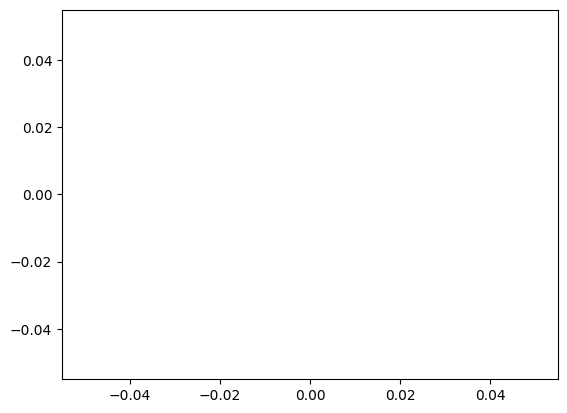

In [293]:
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()

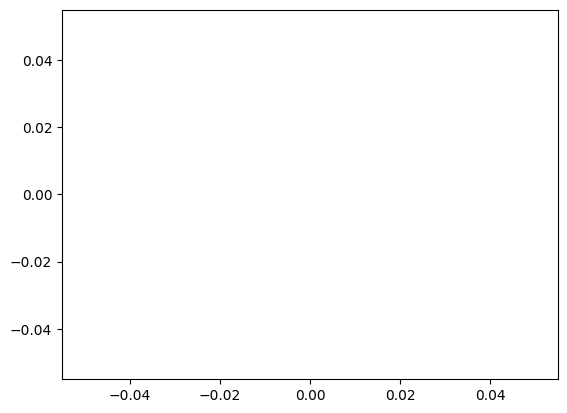

In [294]:
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()

In [295]:
sa = SAnnealing(domain=((0, 32),), step=1, final_temperature=0.1, temperature=200, alpha=0.95, equilibrium=10, time=0, limited_decimals=5)
sa.fit(cubic_function)

NameError: name 'cubic_function' is not defined

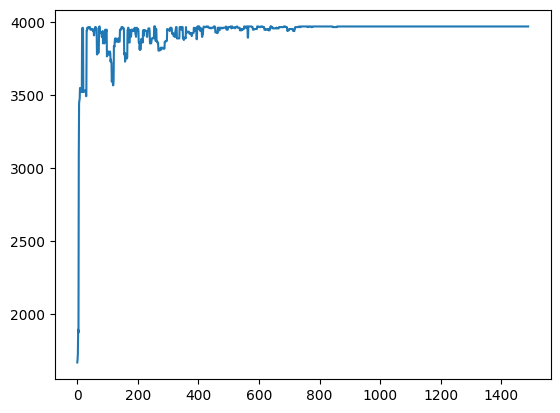

In [ ]:
plt.plot(range(len(sa.cost_)), [x[1] for x in sa.cost_ ])
plt.show()

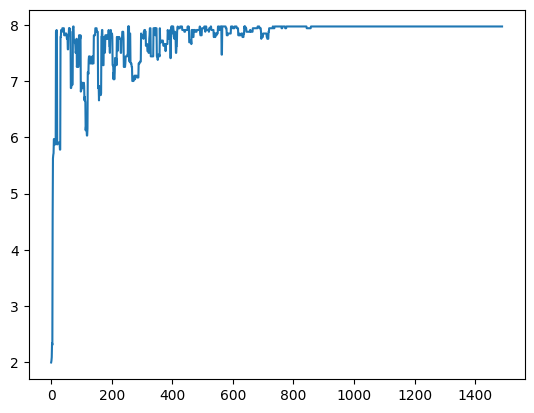

In [ ]:
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()